# OpenCVで畳み込み

## 空間フィルタリング
画像のある場所からエッジやコーナなどを抽出するには、空間フィルタリングを行います。
空間フィルタリングとは、ある特定の画素とその周辺の画素の値から、何らかの計算を行って出力する処理のことです。  
空間フィルタリングのことをフィルタと呼ぶ場合も多いです。

## 畳み込みについて
空間フィルタリングを数式で計算する方法として、畳み込み（convolution）があります。
畳み込みの手法はディープニューラルネットワークでもCNNの技術として活用される重要な考え方です。
今回は畳み込みの考え方と計算方法を学習します。

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
cp  /content/drive/'My Drive'/images/mika2.jpg ./

## 畳み込みの計算
畳みこみ演算を行うには、まずカーネル（フィルタ）を用意します。
例えば3行3列の行列を用意して、その値には目的に応じた値を設定します。

画像全体を平滑化したい場合は、3行3列の行列の要素は全て1/9にします。
このフィルタを画像のある部分に対応させて、画像が本来持っている値とフィルタの値を行列積で計算します。

![代替テキスト](https://itstudio.co/sample/images/conv2s.png)

### 畳み込み演算をPYTHONで確認
畳み込み演算をPython で確認します。
まずは、平滑化を行うカーネルを水平方向のもを作成し、x軸方向だけ画素がある状態つまり、一本線を描いて畳み込み演算を行います。

x軸方向の画素をNampy配列で用意して、[0.3, 0.3, 0.3]のカーネルを適用した例

(1, 12)


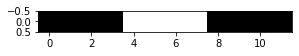

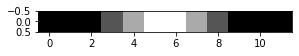

[[0.  0.  0.  0.3 0.6 0.9 0.9 0.6 0.3 0.  0.  0. ]]


In [3]:
X = np.array([[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]],dtype=float)
print(X.shape)

plt.figure(figsize=(10, 5), dpi=72)
plt.subplot(1,2,1); plt.imshow(X, cmap='gray')
plt.show()

# カーネル
W1 = np.array([[0.3, 0.3, 0.3]])

# 畳み込み
C1 = np.copy(X)
for i in range(3,13,1):
  C1[0,i-2] = np.dot(X[0,i-3:i],W1[0,:])

plt.figure(figsize=(10, 5), dpi=72)
plt.subplot(1,2,2); plt.imshow(C1, cmap='gray')
plt.show()
print(C1)

## 写真を使って畳み込み演算を実行

In [0]:
img_bgr =cv2.imread('mika2.jpg')
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [22]:
img

array([[[248, 249, 251],
        [248, 249, 251],
        [248, 249, 251],
        ...,
        [248, 249, 251],
        [248, 249, 251],
        [248, 249, 251]],

       [[248, 249, 251],
        [248, 249, 251],
        [248, 249, 251],
        ...,
        [248, 249, 251],
        [248, 249, 251],
        [248, 249, 251]],

       [[248, 249, 251],
        [248, 249, 251],
        [248, 249, 251],
        ...,
        [248, 249, 251],
        [248, 249, 251],
        [248, 249, 251]],

       ...,

       [[247, 248, 250],
        [247, 248, 250],
        [248, 249, 251],
        ...,
        [236, 226, 175],
        [234, 227, 181],
        [243, 240, 197]],

       [[245, 246, 248],
        [245, 246, 248],
        [246, 247, 249],
        ...,
        [239, 230, 171],
        [245, 240, 182],
        [231, 229, 170]],

       [[247, 248, 250],
        [245, 246, 248],
        [246, 247, 249],
        ...,
        [231, 222, 163],
        [240, 234, 172],
        [241, 237, 174]]

## 畳み込み処理の画像
OpenCVでは、画像とカーネルの畳み込みの計算は filter2D 関数を使います。
```
filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])
```
* src:画像データ
* ddepth:出力画像のbit深度。負の値を入力することで、入力画像と同じものを指定できる
* kernel:フィルター

**bit深度**：ビット深度とは色数のことです。例えば、1ビットだと0,1の2種類の値を表せるので2色表現できます。8ビットだと0〜255で256色の表現ができます。

均一フィルターの作成

In [5]:
help(cv2.filter2D)

Help on built-in function filter2D:

filter2D(...)
    filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
    .   @brief Convolves an image with the kernel.
    .   
    .   The function applies an arbitrary linear filter to an image. In-place operation is supported. When
    .   the aperture is partially outside the image, the function interpolates outlier pixel values
    .   according to the specified border mode.
    .   
    .   The function does actually compute correlation, not the convolution:
    .   
    .   \f[\texttt{dst} (x,y) =  \sum _{ \stackrel{0\leq x' < \texttt{kernel.cols},}{0\leq y' < \texttt{kernel.rows}} }  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )\f]
    .   
    .   That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
    .   the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
    .   anchor.y - 1)`.
    

In [0]:
kernel = np.ones((3,3)) / 9.0

In [11]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [0]:
img_kel = cv2.filter2D(img,-1,kernel)

In [24]:
img_kel

array([[[248, 249, 251],
        [248, 249, 251],
        [248, 249, 251],
        ...,
        [248, 249, 251],
        [248, 249, 251],
        [248, 249, 251]],

       [[248, 249, 251],
        [248, 249, 251],
        [248, 249, 251],
        ...,
        [248, 249, 251],
        [248, 249, 251],
        [248, 249, 251]],

       [[248, 249, 251],
        [248, 249, 251],
        [248, 249, 251],
        ...,
        [248, 249, 251],
        [248, 249, 251],
        [248, 249, 251]],

       ...,

       [[247, 248, 250],
        [247, 248, 250],
        [247, 248, 250],
        ...,
        [240, 232, 176],
        [237, 231, 178],
        [235, 232, 179]],

       [[246, 247, 249],
        [246, 247, 249],
        [247, 248, 250],
        ...,
        [238, 230, 173],
        [238, 232, 176],
        [239, 234, 179]],

       [[245, 246, 248],
        [246, 247, 249],
        [246, 247, 249],
        ...,
        [242, 234, 175],
        [238, 232, 173],
        [240, 236, 176]]

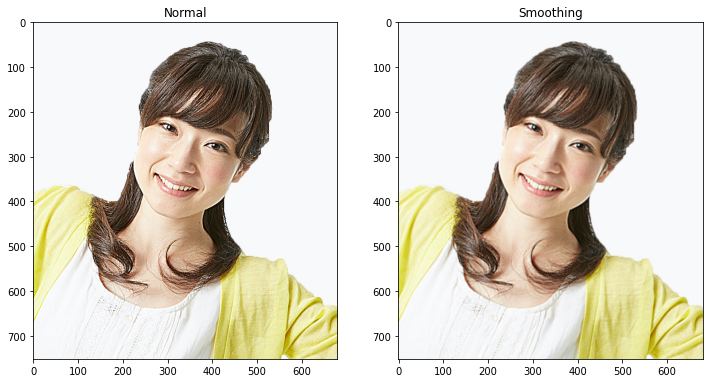

In [25]:
plt.figure(figsize=(12, 12), dpi=72)
plt.subplot(1,2,1);plt.imshow(img);plt.title('Normal')
plt.subplot(1,2,2);plt.imshow(img_kel);plt.title('Smoothing')
plt.show()